In [4]:
import csv
import pandas as pd
import numpy as np
#The point of this code is to parse through the Bay Area Dataset line by line by converting each row to an ordered dictionary.
#In each iteration, the dictionary is processed to remove unnecessary columns, and if the company name in the dictionary corresponds
#with a company on the warn top 30 companies dataset, I append the dictionary to a final merged dataframe containing warn
#and bay_area columns.



# TODO: Parse top 30 names and convert to list
#warn=pd.read_csv(r"C:\Users\Rohit\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\top30.csv")
warn = pd.read_csv(r"C:\Users\Rohit\Desktop\IOER135FinalProject\ImportantCSVs\top30.csv")
top30_company_names = warn['Company Name'].tolist()
top30_company_tickers = warn['Ticker'].tolist()

warn_matched_companies=[] #intermediate variable used to store rows of the warn dataset that match with the bay area company names
final_merged_dictionary=dict() #Dictionary used to store merged bay_area and warn dictionaries
final_merged_dataframe=pd.DataFrame() #Converting each row of merged dictionary and appending it to this dataframe



with open(r"C:\Users\Rohit\Desktop\IOER135FinalProject\ImportantCSVs\bay_area.csv", encoding="utf8") as csvfile:
    colnames=['ID', 'Birth Year', 'Gender Flag', 'Skillset1', 'Skillset1 Weight', 'Skillset2', 'Skillset2 Weight', 'City of profile','Country of profile','Education','Elite Institution', 'Start Date', 'StartFlag','End Date', 'EndFlag', 'CurrentEmployFlag','Length','Role','Dept','Company','Company_Norm','Ticker','Exchange','PublicFlag','Location','Industry','EducationFlag','DegreeType','EliteFlag','Dummy1','Dummy2','Dummy3','Dummy4']
    reader = csv.DictReader(csvfile, delimiter='\t', fieldnames=colnames)
    count=0;

    for idx, row in enumerate(reader):
        if idx % 10000 == 0:
            print(idx)
        #change idx condition to only process the number of rows you want.
        if idx >= 100000:
            break
        #If skillset columns are empty, or if end date is not listed, added
        if row['Skillset1'] == '-1' or row['Skillset2'] == '-1' or row['End Date']=='None':
            continue
        elif row['Company'] in top30_company_names or row['Ticker'] in top30_company_tickers:
       #     indices = [i for i, x in enumerate(top30_company_names) if x == row['Company']]  
            indices = [i for i, (x, y) in enumerate(zip(top30_company_names, top30_company_tickers)) if x == row['Company'] or y == row['Ticker']]
            
            #Only appending rows if layoff and end dates are within a month of eachother
            warn_matched_companies=warn.iloc[indices]
            
            for index,rowwarn in warn_matched_companies.iterrows():
                bay_area_end_date=pd.to_datetime(row['End Date'],infer_datetime_format=True)
                layoff_date=pd.to_datetime(rowwarn['Layoff Date'],infer_datetime_format=True)
                if ((abs(bay_area_end_date-layoff_date) / np.timedelta64(1,'M')) < 1):
                    #Converting warn data to a dictionary
                    warn_dict=dict()
                    warn_dict.update({'Layoff Date':rowwarn['Layoff Date']})
                    warn_dict.update({'Company Name':rowwarn['Company Name']})
                    warn_dict.update({'Employees Affected':rowwarn['Employees Affected']})
                    #merging the warn and bay area dictionaries.
                    final_merged_dictionary.update(row)
                    final_merged_dictionary.update(warn_dict)
                    final_merged_dataframe=final_merged_dataframe.append(pd.DataFrame(final_merged_dictionary,columns=final_merged_dictionary.keys(),index=[count]))
                    count=count+1;

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


In [5]:
final_merged_dataframe.head()

,ID,Birth Year,Gender Flag,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,City of profile,Country of profile,Education,...,EducationFlag,DegreeType,EliteFlag,Dummy1,Dummy2,Dummy3,Dummy4,Layoff Date,Company Name,Employees Affected
0,03a1d9a6-7792-3bf9-aa88-78c8b7cf3e80,1970,2,-1,0,-1,0,San Francisco,United States,5,...,False,,False,,,BBG000C3J3C9,1538828401000,1/20/2016,"Cisco Systems, Inc.",123
1,32cdf8d9-8822-35ee-882e-1ebda53123b1,1994,2,-1,0,-1,0,San Luis Obispo,United States,4,...,False,,False,,,BBG000BH5DV1,1538826468000,8/24/2015,Intuit Inc.,132
2,0256fb2d-d993-3fcf-8ed8-78828a3879d8,1995,1,-1,0,-1,0,San Francisco,United States,4,...,False,,False,,,BBG000C3J3C9,1538805966000,9/14/2015,"Cisco Systems, Inc.",20
3,0256fb2d-d993-3fcf-8ed8-78828a3879d8,1995,1,-1,0,-1,0,San Francisco,United States,4,...,False,,False,,,BBG000C3J3C9,1538805966000,8/18/2016,"Cisco Systems, Inc.",899
4,0256fb2d-d993-3fcf-8ed8-78828a3879d8,1995,1,-1,0,-1,0,San Francisco,United States,4,...,False,,False,,,BBG000C3J3C9,1538805966000,1/17/2017,"Cisco Systems, Inc.",25


In [14]:
#Storing and plotting relevant data from preliminary analysis
dates=dict()
layoffdates=[]
enddates=[]
for x in final_merged_dataframe['Company Name'].unique():
    for y,row in final_merged_dataframe.iterrows():
        if(row['Company Name']==x):
            layoffdates.append(pd.to_datetime(row['Layoff Date']))
            enddates.append(pd.to_datetime(row['End Date']))
    dates.update({x+" Layoff Dates":layoffdates})
    dates.update({x+" End Dates":enddates})
    layoffdates=[]
    enddates=[]

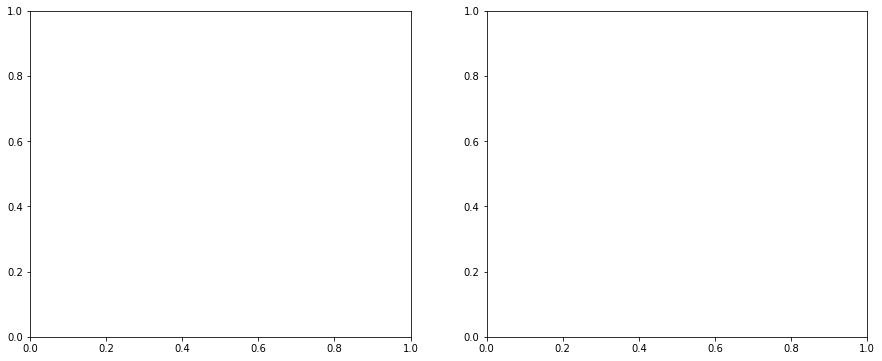

In [22]:
import matplotlib as plt
import datetime

fig, axs = plt.pyplot.subplots(1,2, figsize=(15, 6), facecolor='w', edgecolor='k')


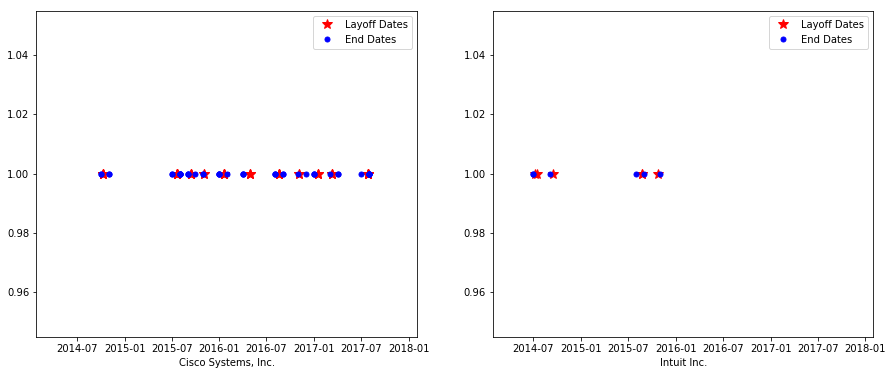

In [23]:

#change 1,2 to something else to change the number of subplots

fig, axs = plt.pyplot.subplots(1,2, figsize=(15, 6), facecolor='w', edgecolor='k')
from textwrap import wrap
axs = axs.ravel()
print(axs)
for y in range(len(final_merged_dataframe['Company Name'].unique())):
    plotlayoff=plt.dates.date2num(dates[final_merged_dataframe['Company Name'][y]+" Layoff Dates"])
    plotend=plt.dates.date2num(dates[final_merged_dataframe['Company Name'][y]+" End Dates"])
    a=axs[y].plot_date(plotlayoff,np.ones((len(plotlayoff),),dtype=int),'r*',markersize=10,label='Layoff Dates')
    b=axs[y].plot_date(plotend,np.ones((len(plotend),),dtype=int),'b.',markersize=10,label='End Dates')
    axs[y].set_xlabel(final_merged_dataframe['Company Name'][y])
    axs[y].legend()
    axs[y].set_xlim([datetime.date(2014, 1, 26), datetime.date(2018, 2, 1)])

    if y==len(axs)-1:
        break


,ID,Birth Year,Gender Flag,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,City of profile,Country of profile,Education,...,Location,Industry,EducationFlag,DegreeType,EliteFlag,Dummy1,Dummy2,Dummy3,Dummy4,item3
0,73cd89ab-53b4-37e2-aa71-33b946454b8f,2001,2,Electrical Engineering,0.8630733771608625,Web Development,0.06353778615806013,San Rafael,United States,4,...,"houston, texas area",33411,False,,False,,,BBG000KHWT55,1538822739000,3


In [ ]:
final_merged_dataframe.head()

In [156]:
a=dict()
list_dict=[]
a.update(row)
a.update({'item3':1})
a.update({'item2':1})
list_dict.append(a)
list_dict

[{'ID': '73cd89ab-53b4-37e2-aa71-33b946454b8f',
  'Birth Year': '2001',
  'Gender Flag': '2',
  'Skillset1': 'Electrical Engineering',
  'Skillset1 Weight': '0.8630733771608625',
  'Skillset2': 'Web Development',
  'Skillset2 Weight': '0.06353778615806013',
  'City of profile': 'San Rafael',
  'Country of profile': 'United States',
  'Education': '4',
  'Elite Institution': 'False',
  'Start Date': '2012-09-01',
  'StartFlag': 'True',
  'End Date': '2014-10-01',
  'EndFlag': 'True',
  'CurrentEmployFlag': 'False',
  'Length': '760',
  'Role': 'Firmware Engineer,engineer',
  'Dept': '',
  'Company': 'Hewlett-Packard Company',
  'Company_Norm': 'Hewlett-Packard Company',
  'Ticker': 'HPQ',
  'Exchange': 'XNYS',
  'PublicFlag': 'True',
  'Location': 'houston, texas area',
  'Industry': '33411',
  'EducationFlag': 'False',
  'DegreeType': '',
  'EliteFlag': 'False',
  'Dummy1': '',
  'Dummy2': '',
  'Dummy3': 'BBG000KHWT55',
  'Dummy4': '1538822739000',
  'item3': 1,
  'item2': 1}]

In [149]:
#Skillsets normalization

#Reading encoded skillsets
common_companies = pd.read_csv(r"C:\Users\Rohit\Desktop\IOER135FinalProject\ImportantCSVs\common_companies.csv")
search_skills=common_companies['Skillset1'].tolist()

bay_area_skills=final_merged_dataframe['Skillset1'].tolist()

from collections import Counter
a=Counter(temp)
normalized_values=(np.asarray([*a.values()])/len(temp)).tolist()
dat2=pd.DataFrame({'Normalized Values':normalized_values})
dat1=pd.DataFrame({'Common Company Skillsets':temp})

normalized_df=dat1.join(dat2)
normalized_df
normalized_df.to_csv('normalized skillset data', sep='\t', encoding='utf-8')


csv.DictReader